In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
import pandas as pd

dat = pd.read_excel('california.xlsx')

In [26]:
dat.head()
dat.shape
daten = dat.dropna()
daten.shape
daten = daten[['Längengrad', 'Breitengrad', 'Einkommen (Median)']]
daten.head()
daten.shape

,Längengrad,Breitengrad,Alter Bewohner (Median),Anzahl Zimmer,Anzahl Schlafzimmer,Anzahl Bewohner,Anzahl Haushalte,Einkommen (Median)
0,-120.54,38.41,21,1435,294.0,668,267,2.5667
1,-117.10,32.70,28,633,137.0,525,170,3.6042
2,-118.43,37.40,19,2460,405.0,1225,425,4.1576
3,-116.50,33.82,16,343,85.0,29,14,2.1042
4,-121.89,37.23,16,3574,466.0,1503,487,8.1988


(20640, 8)

(20433, 8)

,Längengrad,Breitengrad,Einkommen (Median)
0,-120.54,38.41,2.5667
1,-117.10,32.70,3.6042
2,-118.43,37.40,4.1576
3,-116.50,33.82,2.1042
4,-121.89,37.23,8.1988


(20433, 3)

In [27]:
from sklearn.cluster import KMeans

variabilitaet = []

K = range(1,10)

for k in K:
        kMeanModel = KMeans(n_clusters = k)
        kMeanModel.fit(daten)
        variabilitaet.append(kMeanModel.inertia_)

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

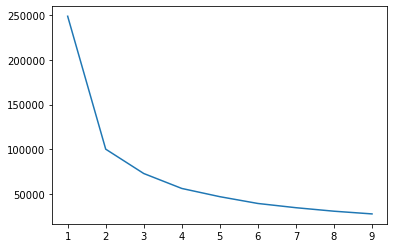

In [28]:
import matplotlib.pyplot as plt
plt.plot(K, variabilitaet)

In [49]:
kMeanModel = KMeans(n_clusters = 4, init = initiale_clusterzentren)
kMeanModel.fit(daten)
kMeanModel.cluster_centers_
kMeanModel.n_iter_
kMeanModel.labels_[:50]

/Users/ralf/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]]),
       n_clusters=4)

array([[-121.62709987,   38.0678169 ,    2.92114605],
       [-118.05609894,   33.86498748,    6.35018723],
       [-121.95261734,   37.66295137,    6.13432486],
       [-117.98894505,   33.96803153,    3.02086114]])

15

array([0, 3, 0, 3, 2, 0, 3, 0, 1, 0, 0, 3, 0, 3, 3, 3, 3, 2, 0, 3, 0, 1,
       2, 0, 0, 0, 2, 1, 3, 2, 3, 1, 1, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 2,
       0, 3, 0, 2, 0, 3], dtype=int32)

In [40]:
import numpy as np

daten[:4]
initiale_clusterzentren = daten[:4]
initiale_clusterzentren = np.array(initiale_clusterzentren)
initiale_clusterzentren

,Längengrad,Breitengrad,Einkommen (Median)
0,-120.54,38.41,2.5667
1,-117.10,32.70,3.6042
2,-118.43,37.40,4.1576
3,-116.50,33.82,2.1042


array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]])

In [41]:
daten_array = np.array(daten)
daten_array[:4]

array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]])

In [42]:
aktuelle_clusterzentren = initiale_clusterzentren

In [43]:
from numpy.linalg import norm

In [59]:
zugewiesene_clusterzentren = []
for i in daten_array:
    abstand = []
    for j in aktuelle_clusterzentren:
        abstand.append(norm(i-j))
    zugewiesene_clusterzentren.append(np.argmin(abstand))
daten_cluster = np.column_stack((daten_array, np.array(zugewiesene_clusterzentren)))
daten_cluster_0 = daten_cluster[daten_cluster[:, 3] == 0]
daten_cluster_1 = daten_cluster[daten_cluster[:, 3] == 1]
daten_cluster_2 = daten_cluster[daten_cluster[:, 3] == 2]
daten_cluster_3 = daten_cluster[daten_cluster[:, 3] == 3]
clusterzentrum_cluster_0 = np.mean(daten_cluster_0, axis = 0)
clusterzentrum_cluster_1 = np.mean(daten_cluster_1, axis = 0)
clusterzentrum_cluster_2 = np.mean(daten_cluster_2, axis = 0)
clusterzentrum_cluster_3 = np.mean(daten_cluster_3, axis = 0)
aktuelle_clusterzentren = np.array([clusterzentrum_cluster_0, clusterzentrum_cluster_1, clusterzentrum_cluster_2, clusterzentrum_cluster_3])
aktuelle_clusterzentren = np.delete(aktuelle_clusterzentren, 3, axis = 1)
aktuelle_clusterzentren
kMeanModel.cluster_centers_

array([[-121.62709987,   38.0678169 ,    2.92114605],
       [-118.05609894,   33.86498748,    6.35018723],
       [-121.95261734,   37.66295137,    6.13432486],
       [-117.98894505,   33.96803153,    3.02086114]])

array([[-121.62709987,   38.0678169 ,    2.92114605],
       [-118.05609894,   33.86498748,    6.35018723],
       [-121.95261734,   37.66295137,    6.13432486],
       [-117.98894505,   33.96803153,    3.02086114]])

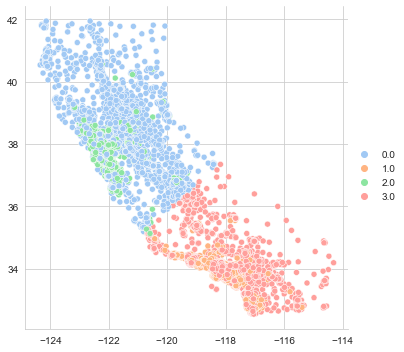

In [28]:
import seaborn as sns

sns.set_style('whitegrid')
sns.relplot(x = daten_cluster[:, 0], y = daten_cluster[:, 1], hue = daten_cluster[:, 3], data=daten_cluster, palette = "pastel", kind='scatter');
